# Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

# Datas

In [8]:
inputs = pd.DataFrame({
    'A': [2,1,2,5,7,2,3,6,1,2,5,4,6,5],
    'B': [2,3,3,3,3,4,4,4,5,5,5,6,6,7],
    'Targets': [0,0,0,1,1,0,0,1,0,0,1,1,1,1]
})

# Model

In [9]:
X = inputs[['A', 'B']]
y = inputs['Targets']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [10]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Confusion matrix :\n", confusion_matrix(y_test, y_pred))

print("Prédiction pour A=4, B=5 :", model.predict([[4,5]])[0])

Accuracy : 0.8
Confusion matrix :
 [[2 1]
 [0 2]]
Prédiction pour A=4, B=5 : 1


Equation of hyperplane: 1.30*A + -0.70*B + -0.70 = 0


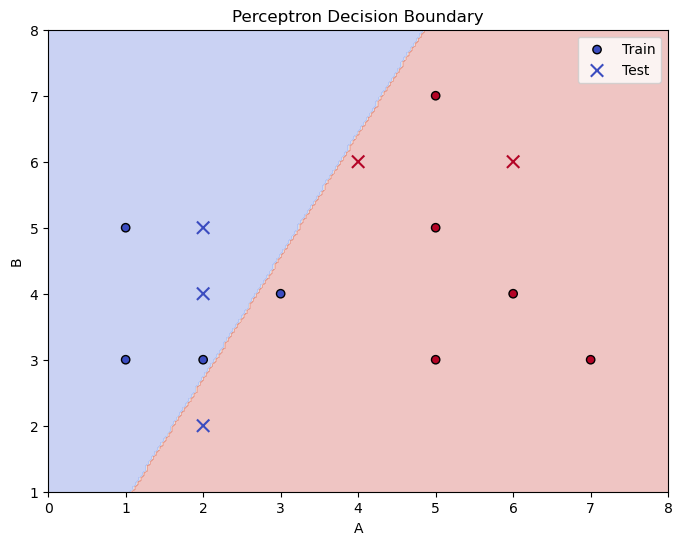

In [11]:
# --- Get weights ---
w = model.coef_[0]
b = model.intercept_[0]

print(f"Equation of hyperplane: {w[0]:.2f}*A + {w[1]:.2f}*B + {b:.2f} = 0")

# --- Plot decision boundary ---
x_min, x_max = X['A'].min() - 1, X['A'].max() + 1
y_min, y_max = X['B'].min() - 1, X['B'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Compute predictions for each grid point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train['A'], X_train['B'], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', label='Train')
plt.scatter(X_test['A'], X_test['B'], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=80, label='Test')

plt.xlabel('A')
plt.ylabel('B')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()